### Testing the correctness of the simulator (Hadamard gate)

In [1]:
from cqt_anyons import AnyonicCircuit
from IPython.display import Latex
from cplot import cplot

qc1 = AnyonicCircuit(1, 3)
# Hadamard sequence
# had_sequence = [[1, 2], [2, 2], [1, -2], [2, -2], [1, 2], [2, 4], [1, -2], [2, 2],
#                 [1, 2], [2, -2], [1, 2], [2, -2], [1, 4]]
# NOT sequence
not_sequence = [[1, -2], [2, -4], [1, 4], [2, -2], [1, 2], [2, 2], [1, -2], [2, 4], [1, -2], [2, 4],
                [1, 2], [2, -4], [1, 2], [2, -2], [1, 2], [2, -2], [1, -2], [1, 0], [2, 0]]

qc1.braid_sequence(not_sequence)

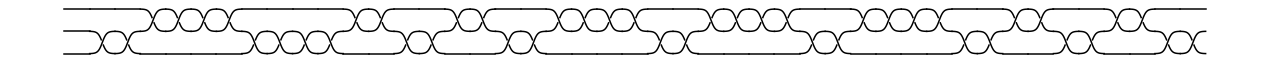

In [2]:
qc1.draw()

In [3]:
Latex(qc1.history(output = "latex"))

<IPython.core.display.Latex object>

In [4]:
print(qc1.unitary().round(decimals=3))

[[ 1.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.001-0.j -0.001+1.j]
 [ 0.   +0.j  0.001+1.j  0.001+0.j]]


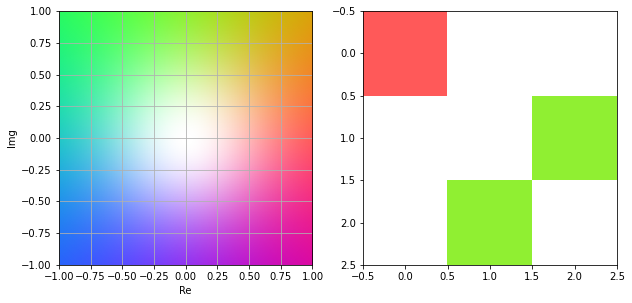

In [5]:
cplot(qc1.unitary())

### Testing the braiding sequence function

In [6]:
from cqt_anyons.circuit import AnyonicCircuit
from IPython.display import Latex

qc1 = AnyonicCircuit(1, 4)
qc2 = AnyonicCircuit(1, 4)

qc1.braid(2, 1).braid(2, 3).braid(2, 3).braid(2, 3).braid(1, 2).braid(1, 2)
qc2.braid_sequence([[1, -1], [2, 3], [1, 2]])

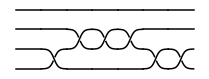

In [7]:
qc1.draw()

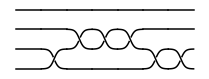

In [8]:
qc2.draw()

In [9]:
Latex(qc1.history(output = "latex"))

<IPython.core.display.Latex object>

In [10]:
Latex(qc2.history(output = "latex"))

<IPython.core.display.Latex object>

------------------------------ 

### 1st PR message

In [11]:
from cqt_anyons.circuit import AnyonicCircuit
import matplotlib.pyplot as plt
import numpy as np

qc = AnyonicCircuit(1, 4)

qc.initialize([1 / np.sqrt(2), 1 / np.sqrt(2), 0, 0, 0])

qc.braid(2, 1).braid(2, 3).braid(1, 2)

qc.measure()


In [12]:
qc.history()

[(2, 1), (2, 3), (1, 2)]

In [13]:
qc.history(output = "sigmas")

['s1', 'is2', 'is1']

In [14]:
from IPython.display import Latex
Latex(qc.history(output = "latex"))

<IPython.core.display.Latex object>

In [15]:
qc.drawer.anyons[2].label = "Beautiful Anyon"
qc.drawer.anyons[1].color = "blue" # the anyon that ends at position 1
qc.drawer.anyons[4].color = "red"

a1 = next(filter(lambda x: x.initial_id == 1, qc.drawer.anyons.values())) # the anyon that starts at position 1
a1.color = "green"

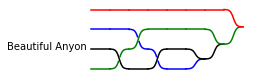

In [16]:
qc.draw()

In [17]:
qc.unitary()

array([[-0.5       -3.63271264e-01j,  0.78615138-2.77555756e-16j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j],
       [-0.63600982-4.62088186e-01j, -0.61803399-2.77555756e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
        -0.30901699-9.51056516e-01j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j, -0.5       -3.63271264e-01j,
         0.78615138-2.77555756e-16j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j, -0.63600982-4.62088186e-01j,
        -0.61803399-2.77555756e-17j]])

In [18]:
qc.statevector()

array([[ 0.20233958-0.25687157j],
       [-0.88674288-0.32674569j],
       [ 0.        +0.j        ],
       [ 0.        +0.j        ],
       [ 0.        +0.j        ]])

In [19]:
qc.run()

{'counts': {'0': 113, '1': 911}, 'memory': array([1, 0, 1, ..., 1, 1, 1])}